<a href="https://colab.research.google.com/github/spe301/Wikipedia-Capstone/blob/main/Discriminator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview

Wikipedia, as the name implies, is the Encyclopedia of the 21st century. It is an amazing place full of free information mantained by a community of volenteer editors. It has assisted in the removal of barriers when it comes to giving and receiving knwoledge. Unfortunatley, with this great democritization comes the potential spread of misinformation and plagarized content. With the rise of complex transformer models such as GPT2, AI can generate persuasive content that is practically identical to human written text.
See what I mean!: https://techcrunch.com/2019/02/17/openai-text-generator-dangerous/

This is where machine learning can help! We can train a Machine learning model to classify whether or not a body of text has been written by a human or an AI and use other NLP strategies to catch plagarism. If this seems like a problem you care about then keep reading!

* Spencer Holley
* aacjpw@gmail.com
* https://github.com/spe301/Wikipedia-Capstone

## Use cases

* wikipedia users and contributers can flag AI generated articles
* prevent AI generated fake news from spreading
* teachers and professors can flag AI generated essays 

## Potosnail Library

learn more at https://github.com/spe301/Potosnail

In [2]:
# restart runtime after installing Potosnail
#!pip install Potosnail==0.0.5
from potosnail import MachineLearning, DeepLearning, DataHelper, Evaluater

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def ModelReadyString(text_str, pad):
  '''converts an individual unit of text into tokenized sequences'''
  text = [text_str]
  t = Tokenizer()
  t.fit_on_texts(text)
  tokens = t.texts_to_sequences(text)
  tokens2 = pad_sequences(tokens, maxlen=pad)
  return tokens2

ml = MachineLearning()
dl = DeepLearning()
dh = DataHelper()
ev = Evaluater()

## Obtain Data

We will concatenate the 180 generated articles with 180 randomly selected real articles

Check out my other notebook if you want to see how the generated articles were made!

https://colab.research.google.com/github/spe301/Wikipedia-Capstone/blob/main/WikiFakes.ipynb

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/spe301/Wikipedia-Capstone/main/Data/HumanText.csv').drop(['Unnamed: 0', 'Unnamed: 0.1'], axis='columns')
df2 = pd.read_csv('https://raw.githubusercontent.com/spe301/Wikipedia-Capstone/main/Data/Generated%20(1).csv').drop(['Unnamed: 0'], axis='columns')
data = pd.concat([df.sample(n=180), df2])
data

,Text,Human,AI
842,chess is a two-player strategy board game play...,1,0
941,printing is a process for mass reproducing tex...,1,0
283,"a gender role, also known as a sex role, is a ...",1,0
181,a cryptocurrency it typically does not exist ...,1,0
344,industry may refer to:,1,0
...,...,...,...
175,by jonathan rosen\n\njonathan rosen is a senio...,0,1
176,he was able to maintain good relations with t...,0,1
177,mealworms are shed during the larval phase of ...,0,1
178,"by\n\nby 2015, syrian president muammar gaddaf...",0,1


## Data Preproccessing 

In [6]:
avg = 0
for i in range(len(data['Text'])):
  avg += len(list(data['Text'])[i].split(' '))/len(data)

pad = int(avg)
pad

1489

In [7]:
train, test = dh.HoldOut(data)

In [8]:
text, lables = dl.ModelReadyText1(train['Text'], train['AI'], pad)
Xtest, ytest = dl.ModelReadyText1(test['Text'], test['AI'], pad)

In [9]:
import numpy as np

words = []
for i in range(len(train)):
  word_lst = list(train['Text'])[i].replace('\n', ' ').split(' ')
  for word in word_lst:
    words.append(word.replace('.', '').replace(',', '').replace(' ', '').replace('"', '').replace(':', '').replace(';', '').replace('!', ''))

vocab = len(np.unique(words))
vocab

39168

# Modeling

the following cell takes 8 hours to run. if you want to build and train a quick model use dl.RNN() or dl.FastRNN()

In [ ]:
params = {'output_dim': [2], #because we have 2 classes
          'embedding': [vocab], #vocab is number of unique words in dataset
          'nodes': [32, 64], #we will test between 32 and 64 nodes for the first layer
          'activation': ['relu', 'tanh'], #we will test between relu and tanh for activation function
          'regularizer': ['L1'], #we will use L1 reqularization to prevent overfitting
          'stacking': [False], #stacking makes the first 2 layers the same, we will not do this
          'dropout': [False], #we will not use dropout because we are already using L1 regularization
          'optimizer': ['adam', 'rmsprop'], #we will test between adam and rmsprop for optimization function
          'method': ['LSTM', 'GRU'], #we will test between using an LSTM cell and a GRU cell
          'bidirectional': [True, False]} #we will test between a bidirectional RNN and a standard RNN
grid = dl.TestDL(params, dl.RNN, 'classification', text, lables, batch_size=64)

Streaming output truncated to the last 5000 lines.
Epoch 24/50
3/3 [==============================] - 1s 201ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.4053 - val_accuracy: 0.8409
Epoch 25/50
3/3 [==============================] - 1s 201ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3177 - val_accuracy: 0.8636
Epoch 26/50
3/3 [==============================] - 1s 201ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.3440 - val_accuracy: 0.8636
Epoch 27/50
3/3 [==============================] - 1s 195ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.3715 - val_accuracy: 0.8182
Epoch 28/50
4/4 [==============================] - 1s 58ms/step - loss: 0.6204 - accuracy: 0.7315
Epoch 1/50
3/3 [==============================] - 5s 565ms/step - loss: 0.6911 - accuracy: 0.5358 - val_loss: 0.6760 - val_accuracy: 0.6136
Epoch 2/50
3/3 [==============================] - 1s 357ms/step - loss: 0.6716 - accuracy: 0.7606 - val_loss: 0.6409 - val_accuracy: 0.8182
Epoch 3

## Evaluation of best model with potosnail

In [ ]:
grid.best_estimator_.model.save('drive/MyDrive/model.h5')

In [ ]:
grid.best_params_

{'activation': 'tanh',
 'bidirectional': True,
 'dropout': False,
 'embedding': 45359,
 'method': 'GRU',
 'nodes': 32,
 'optimizer': 'adam',
 'output_dim': 2,
 'regularizer': 'L1',
 'stacking': False}

In [ ]:
X, y = dl.ModelReadyText1(test['Text'], test['AI'], pad)
grid.best_estimator_.score(X, y)

2/2 [==============================] - 1s 47ms/step - loss: 1.2646 - accuracy: 0.6389


0.6388888955116272

In [ ]:
grid.best_estimator_.score(text, lables)

11/11 [==============================] - 1s 53ms/step - loss: 0.2432 - accuracy: 0.9321


0.9320987462997437

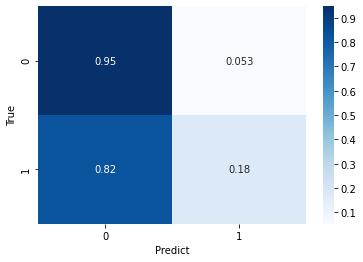

In [12]:
#model.predict(Xtest)
from tensorflow.keras import models

model = models.load_model('drive/MyDrive/model.h5')
ev.BuildConfusionDL(model, Xtest, ytest, cmap='Blues')

## The best Model before Potosnail

In [13]:
model2 = models.load_model('drive/MyDrive/BidFinal.h5')

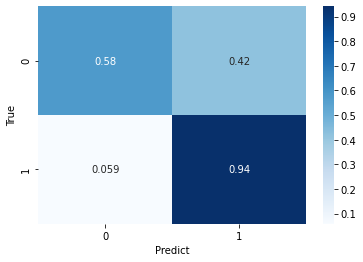

In [15]:
ev.BuildConfusionDL(model2, Xtest, ytest, cmap='Blues')

## Going further with BidFinal

I am going with this one because there was a better TPR (True Positive Rate).

In [17]:
model2.evaluate(Xtest, ytest);

2/2 [==============================] - 1s 40ms/step - loss: 0.5570 - accuracy: 0.7500


In [19]:
model.evaluate(Xtest, ytest);

2/2 [==============================] - 1s 43ms/step - loss: 1.6917 - accuracy: 0.5833


In [20]:
model2.evaluate(text, lables);

11/11 [==============================] - 0s 44ms/step - loss: 0.4273 - accuracy: 0.8241


In [21]:
model.evaluate(text, lables);

11/11 [==============================] - 0s 43ms/step - loss: 1.4387 - accuracy: 0.6204


In [22]:
test.reset_index(inplace=True)

Testing the model on a random article

In [33]:
sample = test.iloc[np.random.randint(35)]
truth = sample['AI']
text_str = sample['Text']
output = model.predict(ModelReadyString(text_str, pad))
output2 = model2.predict(ModelReadyString(text_str, pad))
print('model predicts a {}% probability that an AI wrote this.'.format(round(output[0][1]*100, 2)))
print('model2 predicts a {}% probability that an AI wrote this.'.format(round(output2[0][1]*100, 2)))

model predicts a 4.11% probability that an AI wrote this.
model2 predicts a 97.32% probability that an AI wrote this.


In [34]:
sample

index                                                   85
Text     stuart klein, a professor at the yale school o...
Human                                                    0
AI                                                       1
Name: 22, dtype: object

In [35]:
text_str

'stuart klein, a professor at the yale school of management, has argued that, "the challenges of entrepreneurship are baked in the DNA of human beings. it makes sense that a business which provides an entity that provides a service to another entity should have its business value determined by the service provided." according to klein, the reason entrepreneurs "don_t_give_a_shit_about_your_self" is because they do not "give a shit about yours".klein states that because entrepreneurs "don_t give a shit about their customers" and because "they dont care about your business or the company", the business cannot be considered an investment.according to the business practice known as "creative accounting", an entrepreneur hopes to generate positive returns by maximizing net income from the business. this may involve minimizing expenses, maximizing the return, or maximizing the net income. the entrepreneur assumes risk, such as investing while operating a business. the risk is calculated acco

## Text EDA

1. What would a wordcloud look like for these two seperate collections of text?

insight: first was a major word for both the AI written and Human written articles because the articles often mention that the topic was or is the first to do or be something in particular. United States and german were major in the AI written text because there were many political articles whereas the real articles used terms more general words, like may and many, because they were over a wider variety of topics

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

AI = ','.join(data.loc[data['AI']==1]['Text'])
Human = ','.join(df['Text'])

In [37]:
AiCloud = WordCloud(max_words=50, stopwords=STOPWORDS, background_color='white').generate(AI)
HumanCloud = WordCloud(max_words=50, stopwords=STOPWORDS, background_color='white').generate(Human)

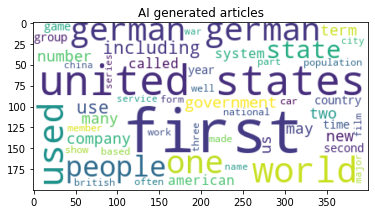

In [43]:
from matplotlib import pyplot as plt

plt.imshow(AiCloud, interpolation='bilinear');
plt.title('AI generated articles')
plt.show()

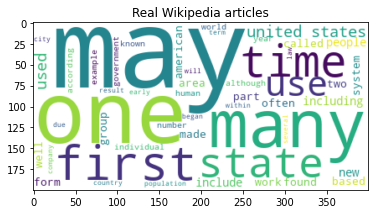

In [44]:
plt.imshow(HumanCloud, interpolation='bilinear');
plt.title('Real Wikipedia articles')
plt.show()

2. What percentage of AI generated text is stopwords compared to the human written text?

insight: both have very little stopwords but the real articles have a slightly lower use of stopwords at 0.39% compared to 0.44%

In [45]:
AiWords = AI.split(' ')
HumanWords = Human.split(' ')
AiStoppers = 0
for word in AiWords:
  if word in list(STOPWORDS):
    AiStoppers += 1

HumanStoppers = 0
for word in HumanWords:
  if word in list(STOPWORDS):
    HumanStoppers += 1

print('the AI written text is {}% stopwords and the Human written text is {}% stopwords'.format(round(AiStoppers/len(AiWords), 2), round(HumanStoppers/len(HumanWords), 2)))

the AI written text is 0.44% stopwords and the Human written text is 0.39% stopwords
